# Heart Disease Dataset

This dataset, originating from 1988, encompasses four distinct databases: Cleveland, Hungary, Switzerland, and Long Beach V. Comprising 76 attributes, it includes a predicted attribute; however, notable experiments primarily utilize a subset of 14 attributes. The crucial "target" field indicates the presence of heart disease in the patient, with integer values of 0 denoting no disease and 1 denoting the presence of disease.

This dataset comprises a set of essential medical attributes, including:

1. **Age**
2. **Sex**
3. **Chest Pain Type (4 values)**
4. **Resting Blood Pressure**
5. **Serum Cholesterol in mg/dl**
6. **Fasting Blood Sugar > 120 mg/dl**
7. **Resting Electrocardiographic Results (values 0,1,2)**
8. **Maximum Heart Rate Achieved**
9. **Exercise-Induced Angina**
10. **Oldpeak: ST Depression Induced by Exercise Relative to Rest**
11. **Slope of the Peak Exercise ST Segment**
12. **Number of Major Vessels (0-3) Colored by Flourosopy**
13. **Thal: 0 = Normal; 1 = Fixed Defect; 2 = Reversible Defect**

It's important to note that the names and social security numbers of the patients have been anonymized and replaced with dummy values in the dataset. These attributes are integral in assessing and predicting the presence of heart disease in patients based on the provided integer values indicating the absence (0) or presence (1) of the disease.

In [1]:
# import require libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
heart_df = pd.read_csv('C:\\Users\\Sakawat Siyam\\Downloads\\archive\\heart disease dataset.csv')
# check the first five rows
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# now we count the target column
heart_df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Let's take a closer look at the numbers in our target column through the lens of 'Value Count.' This operation breaks down the occurrences of 0s and 1s, revealing a remarkable equilibrium between positive and negative values. In simpler terms, our dataset is well-balanced.

This balance is more than just a statistical nicety; it's a practical advantage. A well-balanced dataset simplifies our path forward, requiring minimal preprocessing. However, in the dynamic landscape of real-life projects, such harmony is not always the case. The data we encounter can be imbalanced and noisy, introducing complexities.

As we proceed, stay tuned for our exploration into handling imbalanced data. Real-world challenges await, and we'll be ready to navigate them together in the near future.

In [4]:
# now we check the percentage of this column
heart_df.target.value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

Turning our attention to the percentages, a closer inspection of the target column reveals a breakdown where approximately 51.31% of instances are labeled as 1, indicating a positive outcome, while 48.69% are labeled as 0, denoting a negative outcome. This slight imbalance adds a nuanced layer to our dataset.

In [5]:
# check the dataset information
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Observing the dataset, it's evident that the data is well-distributed. With 13 columns in total, none of them have missing values. This completeness provides a solid foundation for our analysis.

Breaking down the data types, 12 columns consist of integer values, reflecting a substantial portion of the dataset. Additionally, one column stands out with float data, introducing a layer of precision to our numerical values.

In [6]:
# check the null values in dataset
heart_df.isnull().sum().sum()

0

This dataset is well-structured with no null values, ensuring a complete and reliable foundation for analysis. It comprises 13 columns, all filled with data, and no missing values. This cleanliness simplifies our analytical process and enhances the reliability of our insights.

In [7]:
# now we check the statistical information of dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


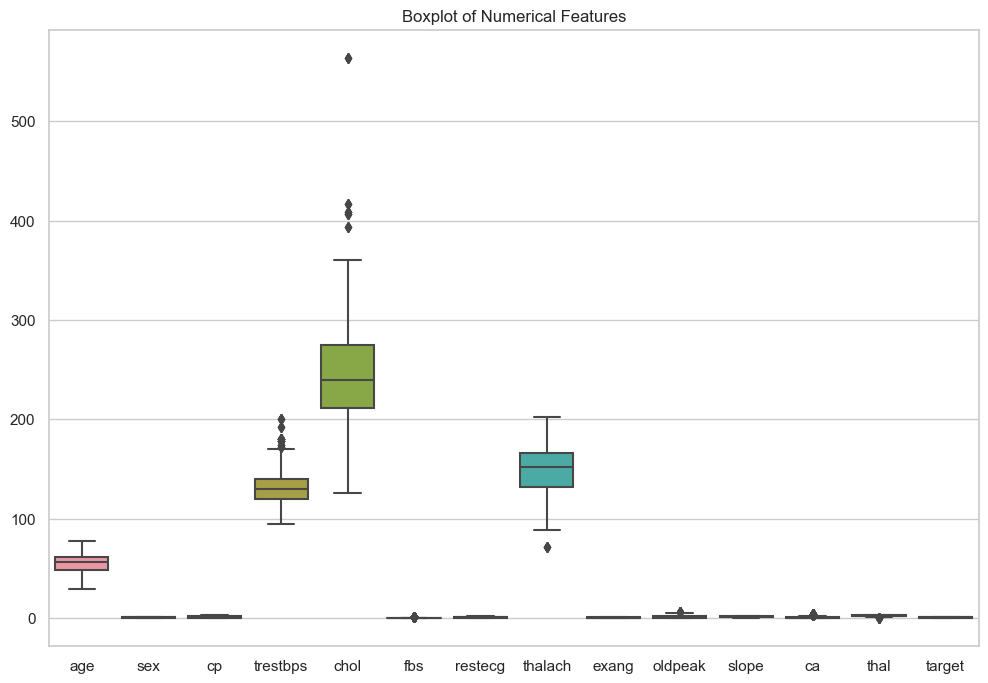

In [8]:
# check the ouliers
sns.set(style="whitegrid")  # Set the style to whitegrid
# Boxplot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=heart_df)
plt.title("Boxplot of Numerical Features")
plt.show()

In examining the dataset, we identify a small number of outliers. It's worth noting that while these outliers exist, they do not exert a significant impact on the overall dataset. Their presence is minimal, and they don't introduce substantial changes that would alter our analytical conclusions

In [9]:
# check the gender distribution
heart_df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In our dataset, gender distribution reveals 713 instances labeled as male and 312 instances labeled as female. It's essential to note that in the 'sex' column, 1 corresponds to male, while 0 corresponds to female. Additionally, in the target column, 1 signifies the presence of heart disease, and 0 indicates no heart disease.

.

Now, let's delve into a comparison between the 'sex' column and the 'target' column to uncover potential insights. As a reminder, in the 'sex' column, 1 represents male, and 0 represents female, while in the 'target' column, 1 signifies the presence of heart disease, and 0 indicates no heart disease. 

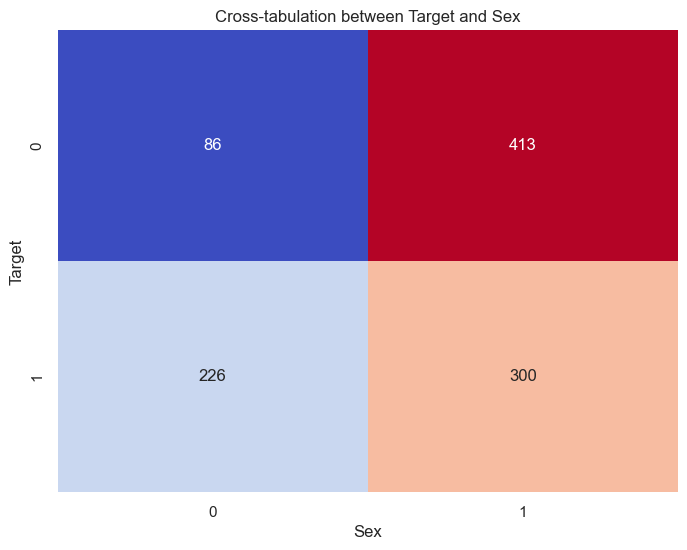

sex,0,1
target,,
0,86,413
1,226,300


In [10]:
# Create a cross-tabulation
cross_tab = pd.crosstab(heart_df['target'], heart_df['sex'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Cross-tabulation between Target and Sex')
plt.xlabel('Sex')
plt.ylabel('Target')
plt.show()
cross_tab

In this analysis, among the 312 females, 226 exhibit symptoms indicative of heart disease. Conversely, out of the 713 males, 300 show conditions associated with heart disease

In [11]:
# check the percentage
pd.crosstab(heart_df.target,heart_df.sex,normalize=True)

sex,0,1
target,,
0,0.083902,0.402927
1,0.220488,0.292683


### Now we drive into Data Visualization

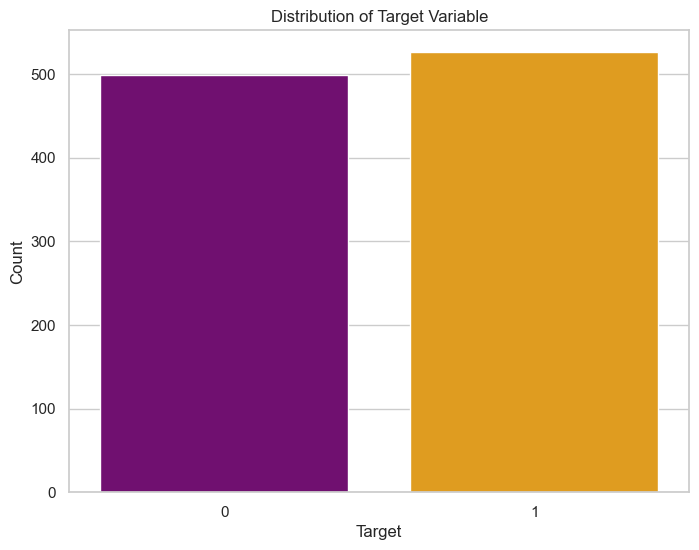

In [12]:
sns.set(style="whitegrid")  # Set the style to whitegrid for a modern look

# Countplot using seaborn with different colors for each bar
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x="target", data=heart_df, palette=["purple", "orange"])
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

<Figure size 1000x500 with 0 Axes>

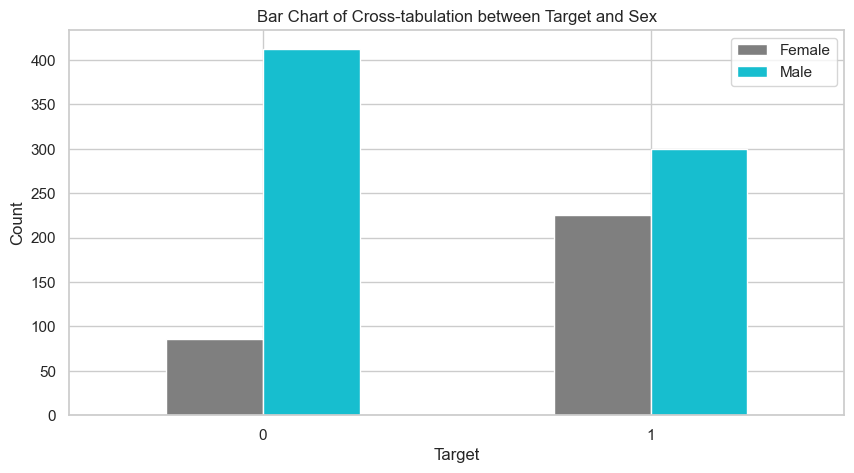

In [13]:
# Create a cross-tabulation
cross_tab = pd.crosstab(heart_df['target'], heart_df['sex'])

# Plot the bar chart
plt.figure(figsize=(10, 5))
cross_tab.plot(kind='bar', color=["#7f7f7f", "#17becf"], figsize=(10, 5))
plt.title('Bar Chart of Cross-tabulation between Target and Sex')
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)  
plt.show()

Let's explore the relationship between age and cholesterol in our dataset by creating a scatter diagram. This visual representation will allow us to observe patterns or trends that may exist between these two independent columns. By combining the data on age and cholesterol levels, we aim to gain a clearer understanding of any potential correlations or insights that may emerge from their interaction.

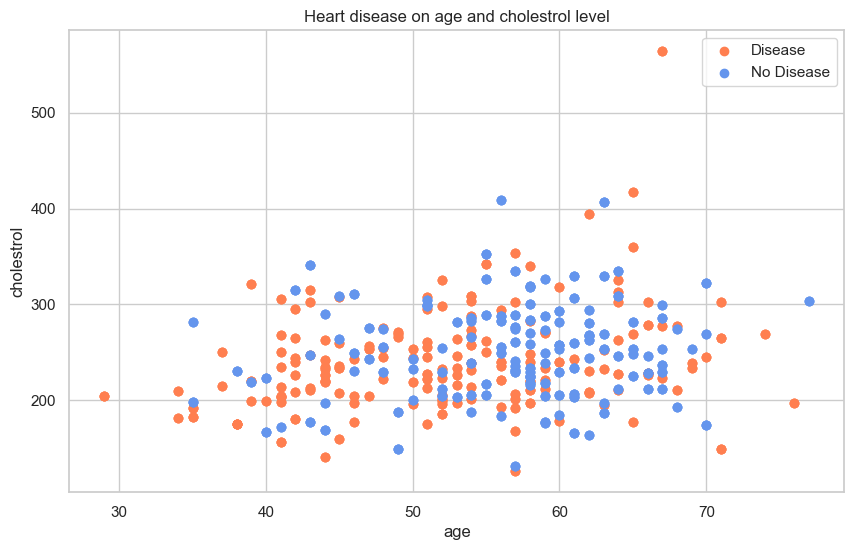

In [14]:
plt.figure(figsize = (10,6))

plt.scatter(heart_df.age[heart_df.target == 1],
           heart_df.chol[heart_df.target ==1], 
           color = "#FF7F50")

plt.scatter(heart_df.age[heart_df.target==0],
           heart_df.chol[heart_df.target==0],
           color = "#6495ED")

plt.xlabel("age")
plt.ylabel("cholestrol")
plt.legend(["Disease", "No Disease"])
plt.title("Heart disease on age and cholestrol level")
plt.xticks(rotation = 0);

Continuing our exploration, let's create a scatter plot to visualize the relationship between age and maximum heart rate in the dataset. This graphical representation will provide insights into how age correlates with the maximum heart rate, offering a visual perspective on any patterns or trends that may exist between these two variables.

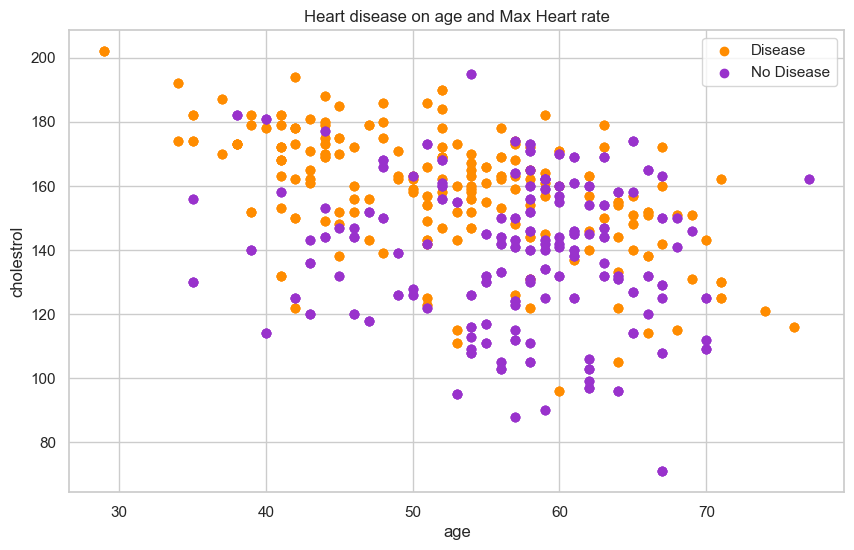

In [15]:
plt.figure(figsize = (10,6))

plt.scatter(heart_df.age[heart_df.target == 1],
           heart_df.thalach[heart_df.target ==1], 
           color = "#FF8C00")

plt.scatter(heart_df.age[heart_df.target==0],
           heart_df.thalach[heart_df.target==0],
           color = "#9932CC")

plt.xlabel("age")
plt.ylabel("cholestrol")
plt.legend(["Disease", "No Disease"])
plt.title("Heart disease on age and Max Heart rate")
plt.xticks(rotation = 0);

Let's generate a cross-tabulation to examine the relationship between different variables in our dataset. 

In [16]:
# crosstab between target and chest pain
pd.crosstab(heart_df.target,heart_df.cp)

cp,0,1,2,3
target,,,,
0,375,33,65,26
1,122,134,219,51


<Figure size 1000x600 with 0 Axes>

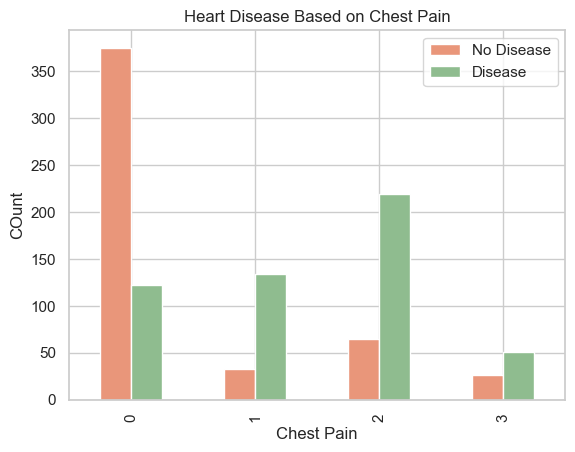

In [17]:
# lets define with visualization
ct = pd.crosstab(heart_df['cp'],heart_df['target'])
# plot the bar chart
plt.figure(figsize=(10,6))
ct.plot(kind='bar',color = ['#E9967A','#8FBC8F'])
plt.title('Heart Disease Based on Chest Pain')
plt.xlabel('Chest Pain')
plt.ylabel('COunt')
plt.legend(['No Disease','Disease'])
plt.show()

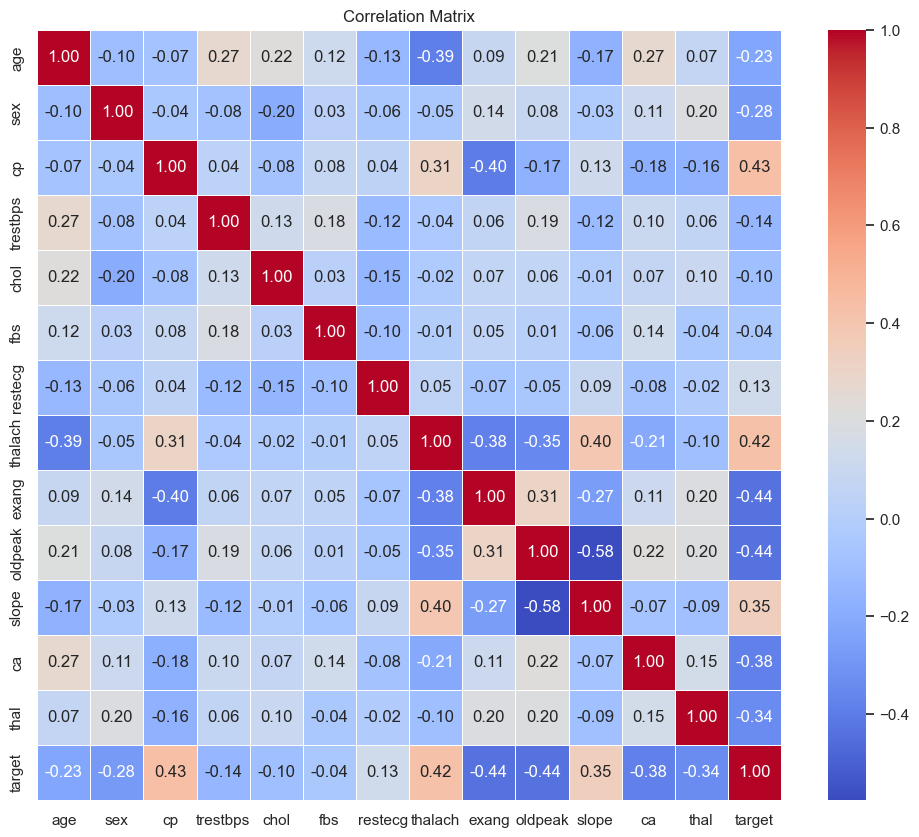

In [18]:
# now check the correlation among variables
cor_matrix = heart_df.corr()
cor_matrix

# visualization with heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

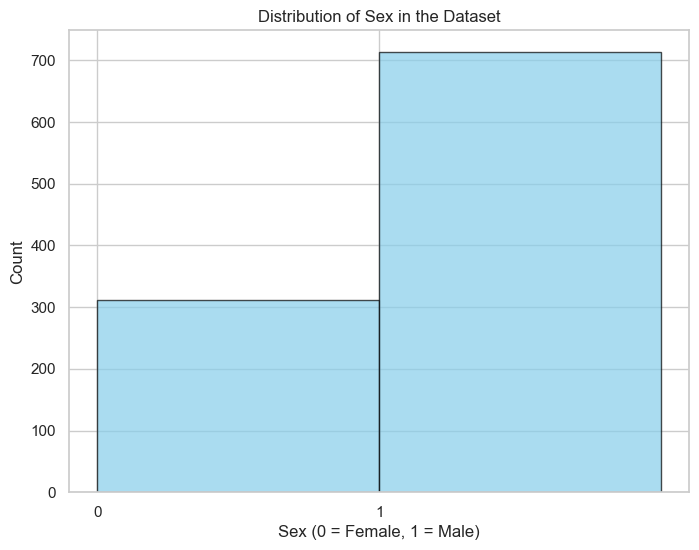

In [19]:
plt.figure(figsize=(8, 6))

# Create a histogram for the 'sex' column
plt.hist(heart_df['sex'], bins=[0, 1, 2], color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Sex in the Dataset')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

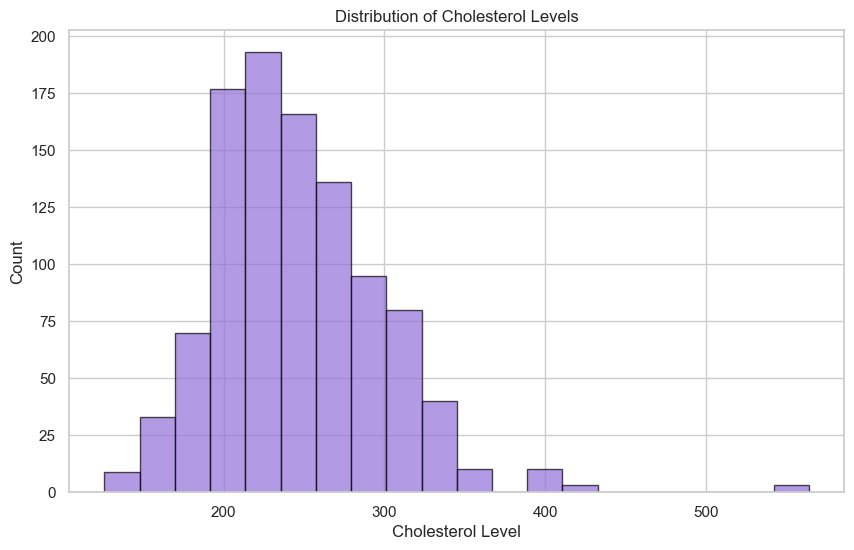

In [20]:
plt.figure(figsize=(10, 6))
colors = ['#9370DB']
plt.hist(heart_df['chol'], bins=20, color=colors, edgecolor='black', alpha=0.7)

plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

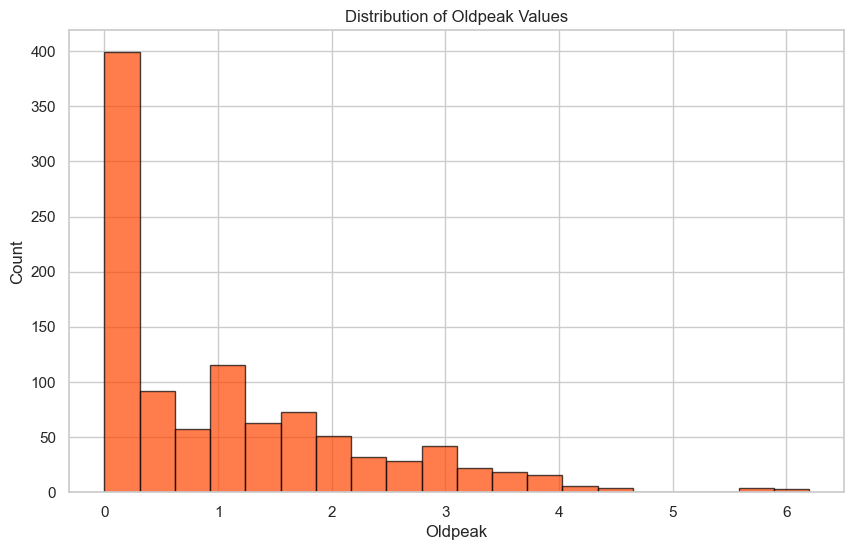

In [21]:
plt.figure(figsize=(10, 6))

# Create a histogram for the 'oldpeak' column
plt.hist(heart_df['oldpeak'], bins=20, color='#FF4500', edgecolor='black', alpha=0.7)

plt.title('Distribution of Oldpeak Values')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

# Now we create Modeling and Predicting


### Import libarires

In [22]:
from sklearn.preprocessing import StandardScaler # for data preprocessing
from sklearn.model_selection import train_test_split # for spilting dataset
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [23]:
# We selecting our independent variable
data = heart_df

In [24]:
y = data['target']
X= data.drop('target',axis = 1)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

Before applying an algorithm, it is essential to verify if the data is evenly distributed. Data imbalance can lead to problems, and ensuring a balanced distribution is crucial to prevent issues related to imbalanced datasets.

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

I explore various machine learning algorithms to identify the most accurate predictor:

1. **Logistic Regression**
2. **Naive Bayes**
3. **Random Forest Classifier**
4. **Extreme Gradient Boost**
5. **K-Nearest Neighbour**
6. **Decision Tree**
7. **Support Vector Machine**

I compare the performance of these algorithms to determine which one provides the most accurate predictions for the given task.

In [26]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
lr_acc_score = accuracy_score(y_test,lr_predict)
print('confusion matrix')
print(lr_conf_matrix)
print("\n")
print('Accuracy of Logistics Regression :',lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confusion matrix
[[74 26]
 [ 6 99]]


Accuracy of Logistics Regression : 84.39024390243902 

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       100
           1       0.79      0.94      0.86       105

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



In [27]:
m2 = 'Naive Bayes'
nb = GaussianNB()
model = nb.fit(X_train,y_train)
nb_predict = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,nb_predict)
nb_acc_score = accuracy_score(y_test,nb_predict)
print('confusion matrix')
print(nb_conf_matrix)
print("\n")
print('Accuracy of Naive Bayes Model :',nb_acc_score*100,'\n')
print(classification_report(y_test,nb_predict))

confusion matrix
[[77 23]
 [ 9 96]]


Accuracy of Naive Bayes Model : 84.39024390243902 

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       100
           1       0.81      0.91      0.86       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



In [28]:
m3 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=20,random_state=10,max_depth=5)
model = rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_acc_score = accuracy_score(y_test,rf_predict)
print('confusion matrix')
print(rf_conf_matrix)
print("\n")
print('Accuracy of Random Forest :',rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predict))

confusion matrix
[[ 87  13]
 [  3 102]]


Accuracy of Random Forest : 92.19512195121952 

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       100
           1       0.89      0.97      0.93       105

    accuracy                           0.92       205
   macro avg       0.93      0.92      0.92       205
weighted avg       0.93      0.92      0.92       205



In [29]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate = 0.01,n_estimators = 25, max_depth=15,
                    gamma=0.6,subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lamda=2,booster='dart',colsample_bylevel=0.6,comsample_bynode=0.5)
xgb.fit(X_train,y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test,xgb_predicted)
xgb_acc_score = accuracy_score(y_test,xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 84  16]
 [  2 103]]


Accuracy of Extreme Gradient Boost: 91.21951219512195 

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       100
           1       0.87      0.98      0.92       105

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205



c:\Users\Sakawat Siyam\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:43:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "comsample_bynode", "reg_lamda" } are not used.

  warnings.warn(smsg, UserWarning)


In [30]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[83 17]
 [12 93]]


Accuracy of K-NeighborsClassifier: 85.85365853658537 

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       100
           1       0.85      0.89      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [31]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[98  2]
 [10 95]]


Accuracy of DecisionTreeClassifier: 94.14634146341463 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       100
           1       0.98      0.90      0.94       105

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [32]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 95   5]
 [  4 101]]


Accuracy of Support Vector Classifier: 95.60975609756098 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.95      0.96      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [33]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,84.390244
1,Naive Bayes,84.390244
2,Random Forest,92.195122
3,Extreme Gradient Boost,91.219512
4,K-Nearest Neighbour,85.853659
5,Decision Tree,94.146341
6,Support Vector Machine,95.609756
